In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("./train.csv")

In [ ]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### let's start by analysing the data

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

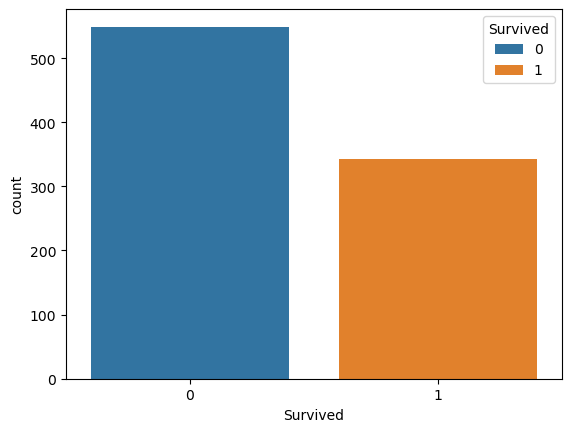

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot(x="Survived", data=df_test, ax=ax, hue="Survived")

<Axes: xlabel='Survived', ylabel='count'>

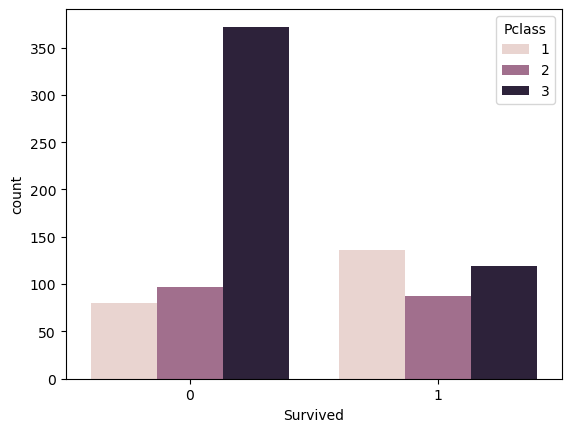

In [8]:
f,ax = plt.subplots(1,1)
sns.countplot(x="Survived", data=df_train, ax=ax, hue="Pclass")

In [9]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
# Get title counts
title_counts = df_train['Title'].value_counts()

# Titles to keep (count >= 5)
titles_to_keep = title_counts[title_counts >= 5].index

# Filter dataframe to keep only rows with common titles
df_train = df_train[df_train['Title'].isin(titles_to_keep)]

In [14]:
df_train['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


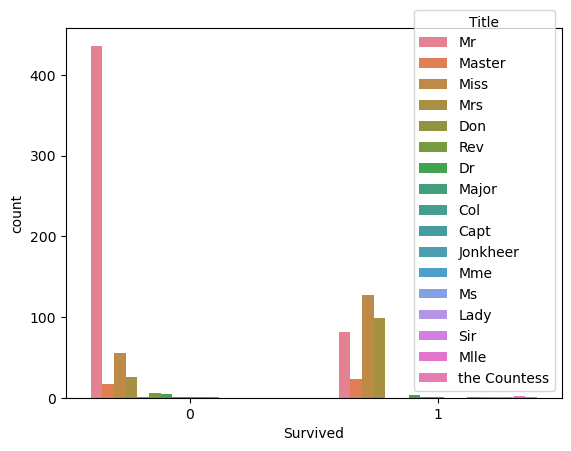

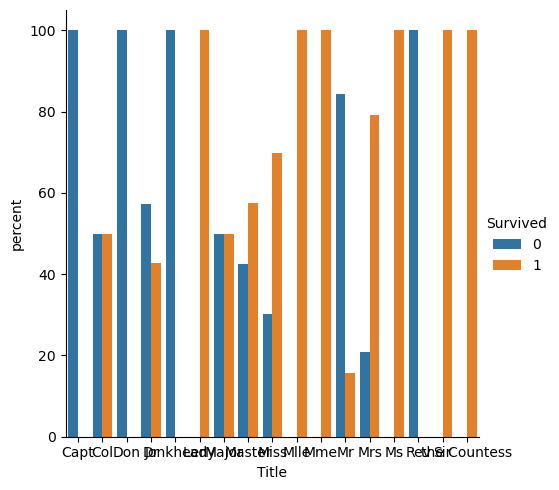

In [15]:
import re

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)

# See unique titles
print(df_train['Title'].unique())

# Now you can plot by Title
f,ax = plt.subplots(1,1)
sns.countplot(x="Survived", data=df_train, ax=ax, hue="Title")

x,y = 'Title', 'Survived'
(df_train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

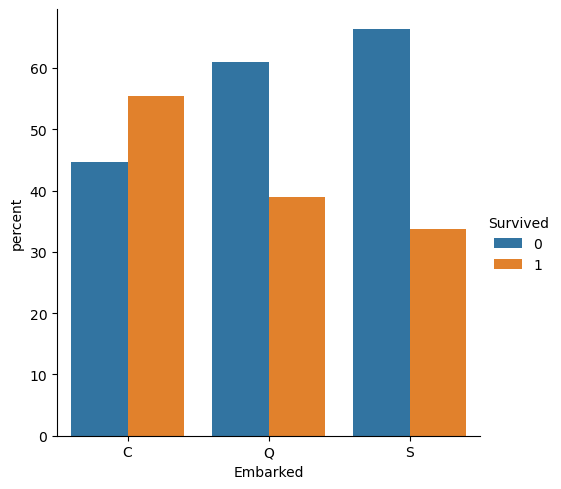

In [16]:
x,y = 'Embarked', 'Survived'
(df_train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

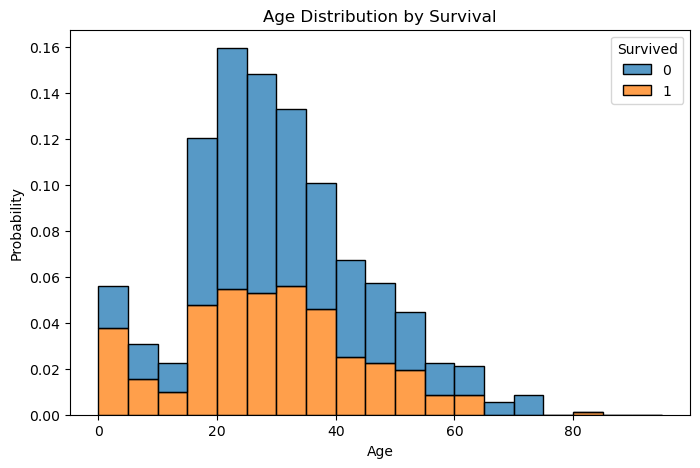

In [17]:
# Plot the distribution of Age with respect to Survived
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(data=df_train, x="Age", hue="Survived", multiple="stack", bins=np.arange(0,100,5), ax=ax, stat="probability")
ax.set_title("Age Distribution by Survival")
plt.show()

C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\4205481785.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby('AgeBin')['Survived']


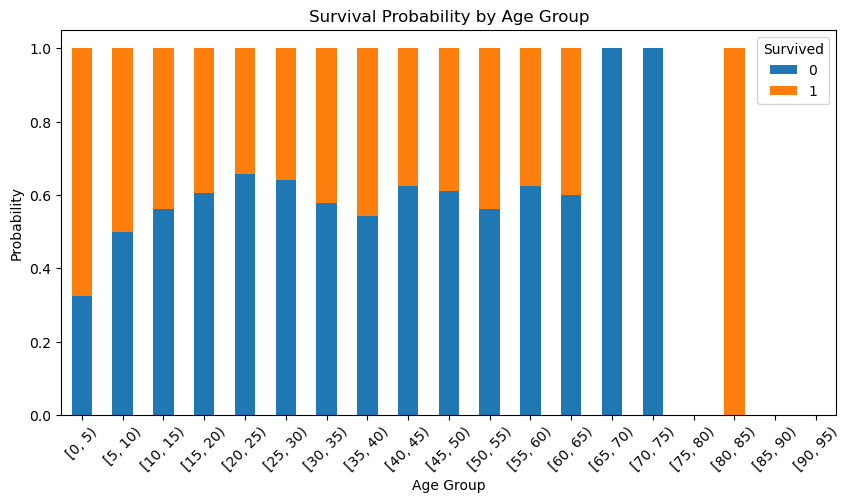

In [18]:
# Bin the ages
age_bins = np.arange(0, 100, 5)
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=age_bins, right=False)

# Compute normalized survival distribution per bin
age_survival = (
    df_train.groupby('AgeBin')['Survived']
    .value_counts(normalize=True)
    .rename("Probability")
    .reset_index()
)

# Pivot to get columns for each Survived value
pivoted = age_survival.pivot(index="AgeBin", columns="Survived", values="Probability").fillna(0)

# Plot stacked bars (each bar sums to 1)
pivoted.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5)
)

plt.title("Survival Probability by Age Group")
plt.ylabel("Probability")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Survived")
plt.show()


In [19]:
set([i[0] for i in df_train.Cabin if isinstance(i, str)])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import re

df_train = pd.read_csv("./train.csv")

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}

df_train['Title'] = df_train['Title'].map(title_map).fillna("Rare")

# Encode as integers
title_encoding = {title: i for i, title in enumerate(df_train['Title'].unique())}

X = df_train.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)
cabin_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
X['Cabin'] = df_train['Cabin'].apply(lambda x: cabin_map.get(str(x)[0], 0) if pd.notnull(x) else 0)
title_encoding = {title: i for i, title in enumerate(df_train['Title'].unique())}
X['Title'] = df_train['Title'].apply(lambda x: title_encoding.get(x, 0) if pd.notnull(x) else 0)
X['Ticket'] = df_train['Ticket'].apply(lambda ticket: 0 if ticket.isdigit() else 1)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X = X.dropna()
y = X['Survived']
X = X.drop('Survived', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\3458333753.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\3458333753.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)


LogisticRegression(max_iter=1000)

In [141]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,22.0,1,0,1,7.2500,0,3.0,0
1,2,1,0,38.0,1,0,1,71.2833,3,1.0,1
2,3,3,0,26.0,0,0,1,7.9250,0,3.0,2
3,4,1,0,35.0,1,0,0,53.1000,3,3.0,1
4,5,3,1,35.0,0,0,0,8.0500,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,0,13.0000,0,3.0,4
887,888,1,0,19.0,0,0,0,30.0000,2,3.0,2
888,889,3,0,28.0,1,2,1,23.4500,0,3.0,2
889,890,1,1,26.0,0,0,0,30.0000,3,1.0,0


In [142]:
y_pred = model.predict(X_scaled)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Confusion Matrix:
 [[476  73]
 [ 94 248]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       549
           1       0.77      0.73      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



In [143]:
df_test = pd.read_csv("./test.csv")

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_test['Title'] = df_test['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}

df_test['Title'] = df_test['Title'].map(title_map).fillna("Rare")

X = df_test.drop("Name", axis=1)
X.replace({'Sex': {'female': True, 'male': False}}, inplace=True)
X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)
cabin_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
X['Cabin'] = df_test['Cabin'].apply(lambda x: cabin_map.get(str(x)[0], 0) if pd.notnull(x) else 0)
title_encoding = {title: i for i, title in enumerate(df_test['Title'].unique())}
X['Title'] = df_test['Title'].apply(lambda x: title_encoding.get(x, 0) if pd.notnull(x) else 0)
X['Ticket'] = df_test['Ticket'].apply(lambda ticket: 0 if ticket.isdigit() else 1)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X.replace({'Fare': {np.nan:np.nanmedian(X.Fare)}}, inplace=True)
# X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\4163235890.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': True, 'male': False}}, inplace=True)
C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\4163235890.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)


In [144]:
y_pred = model.predict(X_scaled)

N = len(X.PassengerId)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (X.PassengerId[i], y_pred[i])

np.savetxt("./logisitic_submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

In [145]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [127]:
N = len(X.PassengerId)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (X.PassengerId[i], y_pred_dt[i])

np.savetxt("./kaggle_data/titanic/submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

NameError: name 'y_pred_dt' is not defined

In [195]:
df_train = pd.read_csv("./train.csv")

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}

df_train['Title'] = df_train['Title'].map(title_map).fillna("Rare")

# Encode as integers
title_encoding = {title: i for i, title in enumerate(df_train['Title'].unique())}
X['Title'] = df_train['Title'].map(title_encoding)

X = df_train.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)
cabin_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
X['Cabin'] = df_train['Cabin'].apply(lambda x: cabin_map.get(str(x)[0], 0) if pd.notnull(x) else 0)
title_encoding = {title: i for i, title in enumerate(df_train['Title'].unique())}
X['Title'] = df_train['Title'].apply(lambda x: title_encoding.get(x, 0) if pd.notnull(x) else 0)
X['Ticket'] = df_train['Ticket'].apply(lambda ticket: 0 if ticket.isdigit() else 1)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X = X.dropna()
y = X['Survived']
X = X.drop('Survived', axis=1)
X = X.drop("Parch", axis=1)
X = X.drop("SibSp", axis=1)

X_scaled = X

C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\257624950.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\257624950.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)


In [196]:
X

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,22.0,1,7.2500,0,3.0,0
1,2,1,0,38.0,1,71.2833,3,1.0,1
2,3,3,0,26.0,1,7.9250,0,3.0,2
3,4,1,0,35.0,0,53.1000,3,3.0,1
4,5,3,1,35.0,0,8.0500,0,3.0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,13.0000,0,3.0,4
887,888,1,0,19.0,0,30.0000,2,3.0,2
888,889,3,0,28.0,1,23.4500,0,3.0,2
889,890,1,1,26.0,0,30.0000,3,1.0,0


In [197]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_scaled, y)

y_pred_dt = dt_model.predict(X_scaled)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_dt))
print("\nClassification Report:\n", classification_report(y, y_pred_dt))

Confusion Matrix:
 [[549   0]
 [  0 342]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



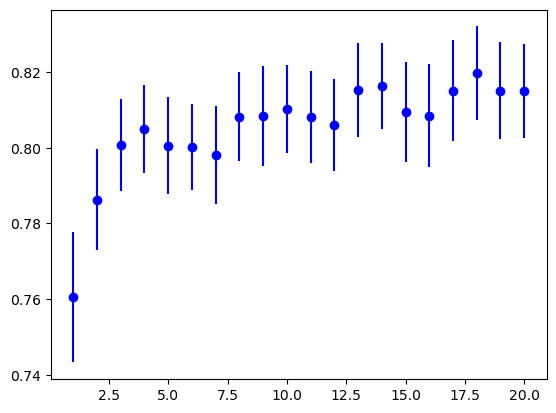

In [198]:
f,ax = plt.subplots(1,1)

for n in range(1,21):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=n)
    # 5-fold CV
    cv_scores = cross_val_score(rf_model, X, y, cv=50, scoring='accuracy')
    
    ax.errorbar(n, np.mean(cv_scores), yerr=np.std(cv_scores)/np.sqrt(len(cv_scores)), color="blue", marker="o")


In [199]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=5)

# 5-fold CV
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("CV accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

rf_model.fit(X_scaled, y)
y_pred_rf = rf_model.predict(X_scaled)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

CV accuracy scores: [0.65921788 0.7752809  0.83146067 0.76404494 0.79775281]
Mean CV accuracy: 0.7655514405875337
Confusion Matrix:
 [[539  10]
 [ 19 323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       549
           1       0.97      0.94      0.96       342

    accuracy                           0.97       891
   macro avg       0.97      0.96      0.97       891
weighted avg       0.97      0.97      0.97       891



In [200]:
import pandas as pd

importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance)

Sex            0.205533
Fare           0.182874
PassengerId    0.180863
Age            0.166317
Title          0.085088
Pclass         0.065522
Cabin          0.054826
Embarked       0.035150
Ticket         0.023827
dtype: float64


In [201]:
df_test = pd.read_csv("./test.csv")

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_test['Title'] = df_test['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}

df_test.dropna(subset=["Parch", "SibSp"], inplace=True)

# Extract titles in test set
df_test['Title'] = df_test['Name'].apply(extract_title)
df_test['Title'] = df_test['Title'].map(title_map).fillna("Rare")

# Apply train encoding (do NOT rebuild mapping on test)
df_test['Title'] = df_test['Title'].map(title_encoding).fillna(0).astype(int)

# Numeric conversions
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})
df_test['Embarked'] = df_test['Embarked'].map({'C': 1, 'Q': 2, "S": 3}).fillna(3)

# Cabin mapping
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: cabin_map.get(str(x)[0], 0) if pd.notnull(x) else 0)

# Ticket: numeric vs not
df_test['Ticket'] = df_test['Ticket'].apply(lambda ticket: 0 if ticket.isdigit() else 1)

# Fill missing Age and Fare
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# Final features
X = df_test.drop("Name", axis=1)



C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\3085275740.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
C:\Users\pietr\AppData\Local\Temp\ipykernel_2088\3085275740.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [202]:
N = len(X.PassengerId)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (X.PassengerId[i], y_pred_dt[i])

np.savetxt("./submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

In [203]:
print(df_test['PassengerId'].head())
print(y_pred_rf.shape, df_test.shape)

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64
(891,) (418, 12)
